# Baseline Model

In [1]:
from baseline_utils.train_test_split import DatasetSplitLoader
from baseline_utils.baseline_pipeline import BasePipeline
from sklearn.ensemble import RandomForestClassifier
from baseline_utils.baseline_model_manager import BaselineModelManager


data_path = "../../../data/raw/raw_trainset.csv"
output_dir = "../../../data/baseline_training"


loader = DatasetSplitLoader(data_path, output_dir)

df = loader.load_and_prepare()
splits = loader.create_splits(
    train_ratio=0.7, test_ratio=0.3, validation_ratio=0.0, force=False
)


train_df = splits["train"]
test_df = splits["test"]
val_df = splits["val"]

print("Train size:", len(train_df))
print("Test size:", len(test_df))
print("Validation size:", len(val_df))

Splits already exist – loading from disk
Train size: 2856391
Test size: 1217963
Validation size: 0


In [2]:
pipeline = BasePipeline(target_col="species")
X_train, y_train = pipeline.fit(train_df)
X_test, y_test = pipeline.transform(test_df)

In [3]:
baseline = BaselineModelManager("baseline_models.json")


classifier = [
    (RandomForestClassifier, {"n_estimators": 3, "max_depth": 2}),
    (RandomForestClassifier, {"n_estimators": 2, "max_depth": 2}),
]

for model_class, params in classifier:
    baseline.run_training(
        model_class, params, X_train, y_train, X_test, y_test, X_train.columns
    )

Baseline Model #1 saved to baseline_models.json
Baseline Model #2 saved to baseline_models.json


In [4]:
df_results = baseline.load_baseline_models()
df_results.sort_values("accuracy", ascending=False)

,run_id,timestamp,model,accuracy,precision_macro,recall_macro,f1_macro,params,features
1,2,2025-10-06T13:03:07.521038,RandomForestClassifier,0.483890,0.283516,0.357267,0.304717,"{'n_estimators': 2, 'max_depth': 2}","[doy, b2, b3, b4, b5, b6, b7, b8, b8a, b11, b1..."
0,1,2025-10-06T13:03:02.086389,RandomForestClassifier,0.466769,0.262544,0.319153,0.269904,"{'n_estimators': 3, 'max_depth': 2}","[doy, b2, b3, b4, b5, b6, b7, b8, b8a, b11, b1..."


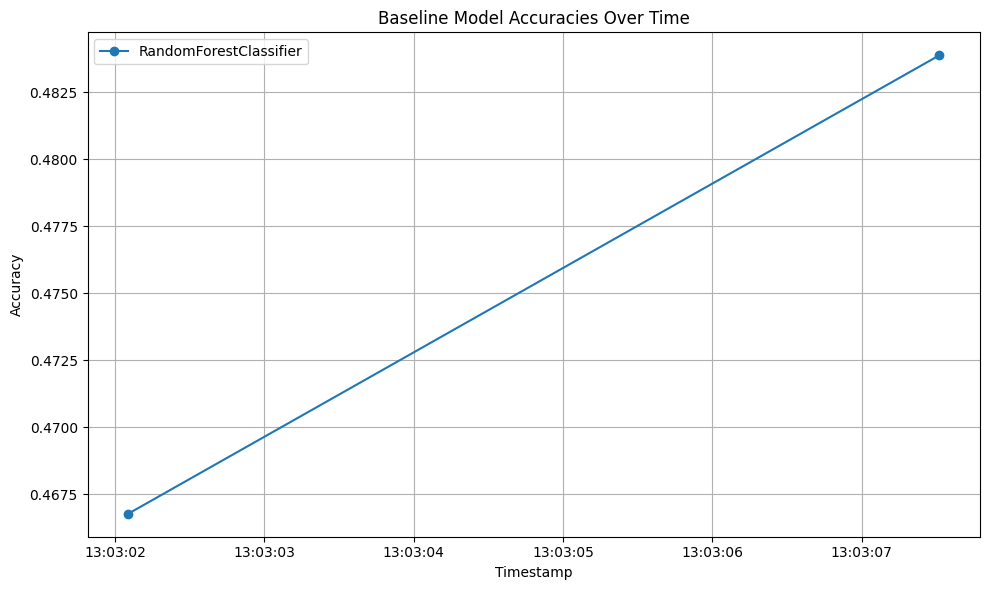

In [5]:
baseline.plot_performance_distribution(column="accuracy")

In [6]:
run_id = 1
exp = baseline.get_baseline_model_by_id(run_id)
print(exp["model"], exp["hyperparams"])

RandomForestClassifier {'n_estimators': 3, 'max_depth': 2}


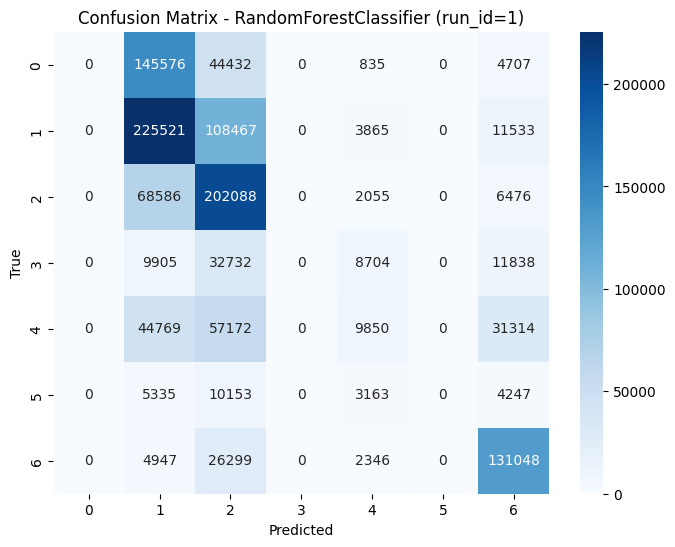

In [7]:
baseline.plot_confusion_matrix(run_id)

In [8]:
baseline.print_classification_report(run_id)


Classification Report - RandomForestClassifier (run_id=1):

Class 0: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 195550.0}
Class 1: {'precision': 0.4468957016798147, 'recall': 0.6454780672379545, 'f1-score': 0.5281367641462487, 'support': 349386.0}
Class 2: {'precision': 0.4198419837828742, 'recall': 0.7237979262549024, 'f1-score': 0.5314273392343416, 'support': 279205.0}
Class 3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 63179.0}
Class 4: {'precision': 0.3196184048283471, 'recall': 0.0688305789455295, 'f1-score': 0.11326851537749463, 'support': 143105.0}
Class 5: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 22898.0}
Class 6: {'precision': 0.6514518077380035, 'recall': 0.7959669582118561, 'f1-score': 0.7164949439999125, 'support': 164640.0}


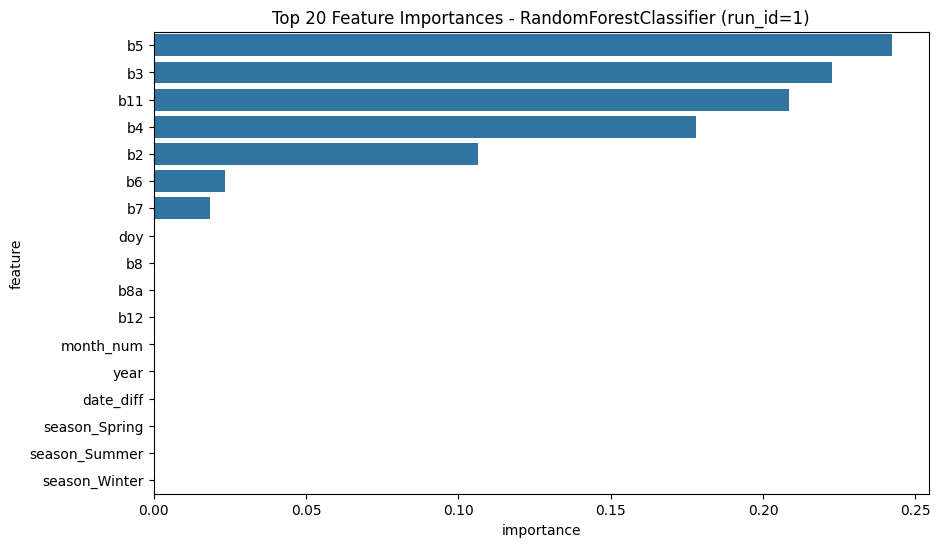

In [9]:
baseline.plot_feature_importances(run_id, top_n=20)